In [1]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)

In [3]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [4]:
features = df.columns[0:-1] #grab all numeric columns of interest
z = StandardScaler()
df[features] = z.fit_transform(df[features])

<AxesSubplot:xlabel='bmi', ylabel='target'>

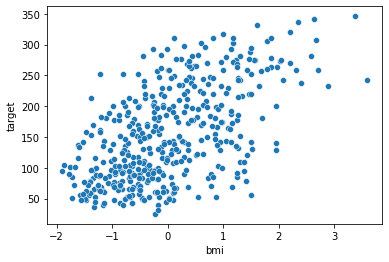

In [5]:
sns.scatterplot(data=df,x="bmi",y="target")

In [6]:
pca = PCA()
pca.fit(df[features])
pca.explained_variance_ratio_

array([0.40242142, 0.14923182, 0.12059623, 0.09554764, 0.06621856,
       0.06027192, 0.05365605, 0.04336832, 0.00783199, 0.00085605])

In [7]:
pcaDF = pd.DataFrame({"pc": range(1,11),"expl_var" : pca.explained_variance_ratio_,  "cum_var": pca.explained_variance_ratio_.cumsum()})
pcaDF.head()

,pc,expl_var,cum_var
0,1,0.402421,0.402421
1,2,0.149232,0.551653
2,3,0.120596,0.672249
3,4,0.095548,0.767797
4,5,0.066219,0.834016


<AxesSubplot:xlabel='pc', ylabel='expl_var'>

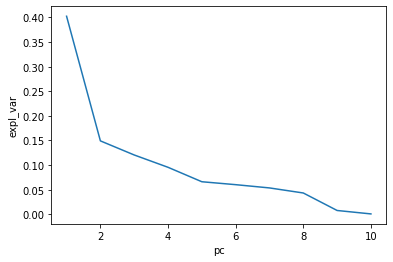

In [8]:
sns.lineplot(data=pcaDF,x ="pc",y="expl_var")

<AxesSubplot:xlabel='pc', ylabel='cum_var'>

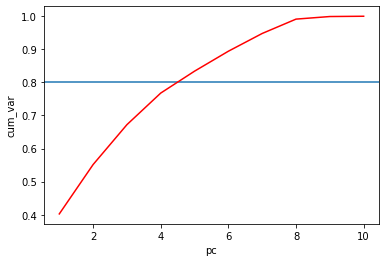

In [9]:
fig,ax = plt.subplots()
ax.axhline(0.8)
sns.lineplot(data=pcaDF,x ="pc",y="cum_var",color='red',ax=ax)

In [10]:
data = pca.transform(df[features])
df4 = pd.DataFrame(data[:,0:4])
df10 = pd.DataFrame(data[:, 0:9])

#modeMod1
rfr1 = RandomForestRegressor()
start = time.time()
rfr1.fit(df[features], df["target"])
stop = time.time()
print("all data: ", rfr1.score(df[features], df["target"]))
print(f"Training time: {stop - start}s")

#modeMod1
rfr2 = RandomForestRegressor()
start = time.time()
rfr2.fit(df10, df["target"])
stop = time.time()
print("10 PCs:   ", rfr2.score(df10, df["target"]))
print(f"Training time: {stop - start}s")

#modeMod1
rfr3 = RandomForestRegressor()
start = time.time()
rfr3.fit(df4, df["target"])
stop = time.time()
print("4 PCs:    ", rfr3.score(df4, df["target"]))
print(f"Training time: {stop - start}s")

all data:  0.9186248043123365
Training time: 0.4037666320800781s
10 PCs:    0.9248170325074605
Training time: 0.38578081130981445s
4 PCs:     0.9234664052749957
Training time: 0.24088311195373535s


In [11]:
# After applying PCA on the data , the results were improved with 10 principle components 
# and descreased a little bit when the number of principle components beacame 4.
# The time also decreses after applying pca and decresing the number of principle components.
# output values changes with each run of the code (can be stablized with random_state)